In [1]:
import torchvision.transforms.functional as F

from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

In [2]:
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/anh.dinh/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


KeyboardInterrupt: 

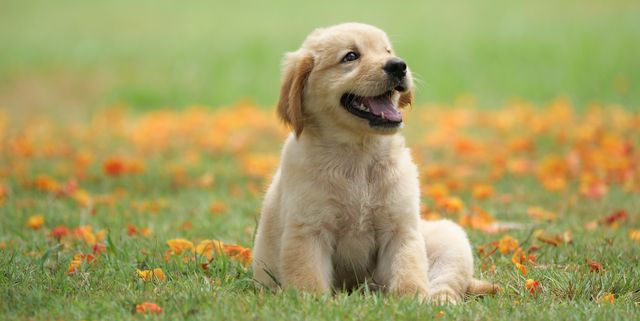

In [ ]:
image = read_image('0.jpg')
F.to_pil_image(image)

In [ ]:
images = [transforms(image)]

In [ ]:
outputs = model(images)

In [ ]:
outputs

[{'boxes': tensor([[249.1979,  21.8053, 447.2407, 307.5422],
          [ 26.5998, 214.4703,  43.9302, 228.8665],
          [272.9685, 201.1622, 498.2244, 302.4723],
          [242.8377,  46.8384, 522.2354, 304.2684],
          [396.7251, 218.2370, 499.0991, 305.0298],
          [446.3288, 179.9728, 459.2829, 188.9055]], grad_fn=<StackBackward0>),
  'labels': tensor([18, 55, 23, 23, 23, 55]),
  'scores': tensor([0.9907, 0.2149, 0.0986, 0.0872, 0.0744, 0.0505],
         grad_fn=<IndexBackward0>)}]

In [ ]:
score_threshold = .8
img_with_boxes = [
    draw_bounding_boxes(image, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for output in outputs
]

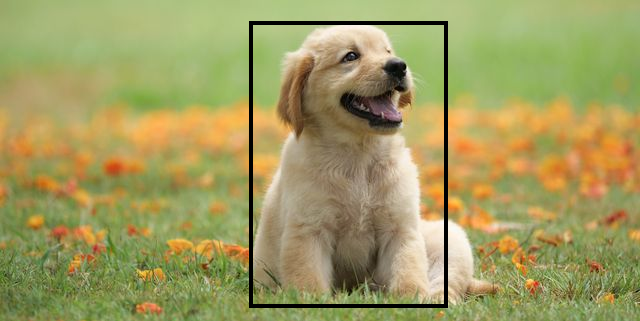

In [ ]:
F.to_pil_image(img_with_boxes[0])